### 1. 마스크이미지를 활용해서 원하는 이미지 가져오기

In [1]:
import matplotlib.pyplot as plt

def im_show(*opencv_images):
    img_number = len(opencv_images)
    plt.figure(figsize=(4*img_number,4))
    for idx, img in enumerate(opencv_images):
        plt.subplot(1, img_number, idx+1)

        # 그레이 스케일 이밎 처리
        if len(img.shape) == 2:
            # 그레이스케일 이미지
            plt.imshow(img, cmap='gray')
        else:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        # plt.axis('off')  # 축 표시 제거
    plt.show()

(640, 1024, 3) (640, 1024)


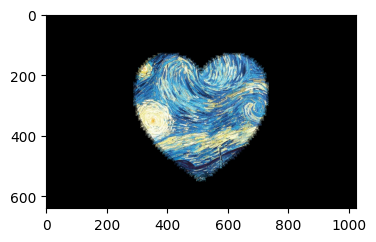

In [2]:
import cv2

# 원본 이미지 로드
original_img = cv2.imread('example_img1.png')

# 마스크 이미지 로드 (원본 이미지와 같은 크기, 흑백 이미지)
mask = cv2.imread('mask_heart.jpg', cv2.IMREAD_GRAYSCALE)
# mask = cv2.bitwise_not(mask)

print(original_img.shape, mask.shape)
# 마스크 이미지를 이용해서 특정 부분만 보존
masked_img = cv2.bitwise_and(original_img, original_img, mask=mask)

# # 최종 결과 이미지 표시
cv2.imwrite("masked_img.jpg", masked_img)
cv2.imshow('masked_img', masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# matplotlib 로 출력하기
im_show(masked_img)

### 1-2.마스크 이미지 적용 -> 알파채널을 이용해서 마스크 제작

In [4]:
# 원본 이미지 로드
original_img = cv2.imread('example_img1.png')
print(original_img.shape)

# 알파 채널 이미지 로드
mask = cv2.imread('cat_face.png', cv2.IMREAD_UNCHANGED)
print(mask.shape)

(640, 1024, 3)
(500, 500, 4)


In [5]:
_, _, _, alpha_channel = cv2.split(mask)

In [6]:
h, w = original_img.shape[:2]
resized_mask = cv2.resize(alpha_channel, (w, h), interpolation=cv2.INTER_AREA)
resized_mask.shape

(640, 1024)

In [7]:
masked_img = cv2.bitwise_and(original_img, original_img, mask=resized_mask)

cv2.imshow("masked_img", masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
target_img = original_img[320-250:320+250, 512-250:512+250]

cv2.imshow("target_img", target_img)
cv2.imshow("original_img", original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
target_img.shape

(500, 500, 3)

In [11]:
mask.shape

(500, 500, 4)

In [12]:
masked_img_target = cv2.bitwise_and(target_img, target_img, mask=alpha_channel)

cv2.imshow("masked_img_target", masked_img_target)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. 특징점 검출

In [13]:
# 이미지 읽기
img = cv2.imread('example_img1.png')  # 입력 이미지 파일 경로
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 이미지를 그레이스케일로 변환

In [14]:
import numpy as np

# Harris Corner Detection
gray = np.float32(gray)  # 그레이스케일 이미지를 float32 타입으로 변환
dst = cv2.cornerHarris(gray, 2, 3, 0.04)  # Harris 코너 검출 함수 적용 / 이미지/블록크기/sobel 미분을 위한 커널 크기

# 결과를 확장된 부분으로 표시
dst = cv2.dilate(dst, None)  # 코너 검출 결과를 더 확실하게 보이도록 확장

# 임계값을 초과하는 코너에 색상 표시
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # 검출된 코너를 빨간색으로 표시

# 결과 출력
cv2.imshow('Harris Corners', img)  # 결과 이미지를 창에 표시
cv2.waitKey(0)  # 키 입력을 대기
cv2.destroyAllWindows()  # 모든 창 닫기

In [15]:
# 이미지 읽기
img = cv2.imread('example_img1.png')  # 입력 이미지 파일 경로
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 생성
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 키포인트를 이미지에 그리기
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT Keypoints', img_sift)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. 특징 매칭

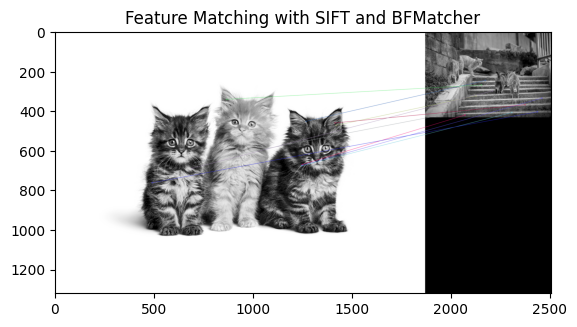

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 파일 경로 설정
image_path1 = 'cat1.png'
image_path2 = 'cat2.jpg'

# 이미지 읽기
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    raise ValueError("Error: Could not open or find the images")

# SIFT 특징점 검출
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Brute-Force 매칭기 생성 및 매칭
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 이미지 그리기
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)
plt.title('Feature Matching with SIFT and BFMatcher')
plt.show()